In [2]:
import sys, os, pickle
sys.path.append('/scratch/oem214/vanilla-rtrl/')
from cluster import *
from continual_learning import *
from core import *
from dynamics import *
from functions import *
from gen_data import * 
from learning_algorithms import *
from optimizers import *
from plotting import *
from wrappers import *
import matplotlib.pyplot as plt

In [5]:
### --- SET UP ALL CONFIGS --- ###
from itertools import product
n_seeds = 1
macro_configs = config_generator(g=[0.3, 0.6, 1.2],
                                 n_h=[32, 128],
                                 lr=[0.01, 0.001])
micro_configs = tuple(product(macro_configs, list(range(n_seeds))))

In [6]:
name = 'hyperparam_check'
file_names = []
for params, i_seed in micro_configs:
    
    np.random.seed(i_seed)

    task = Flip_Flop_Task(3, 0.05, input_magnitudes=None)
    N_train = int(200 / params['lr'])
    N_test = 10000
    checkpoint_interval = int(2 / params['lr'])
    sigma = 0
    data = task.gen_data(N_train, N_test)

    n_in = task.n_in
    n_hidden = params['n_h']
    n_out = task.n_out

    W_in  = np.random.normal(0, np.sqrt(1/(n_in)), (n_hidden, n_in))
    W_rec = params['g'] * np.random.normal(0, np.sqrt(1/n_hidden), (n_hidden, n_hidden))
    W_out = np.random.normal(0, np.sqrt(1/(n_hidden)), (n_out, n_hidden))

    b_rec = np.zeros(n_hidden)
    b_out = np.zeros(n_out)

    alpha = 1
    sigma = 0

    rnn = RNN(W_in, W_rec, W_out, b_rec, b_out,
              activation=tanh,
              alpha=alpha,
              output=identity,
              loss=mean_squared_error)

    #learn_alg = RTRL(rnn, L2_reg=0.0001, L1_reg=0.0001)
    #learn_alg = Efficient_BPTT(rnn, T_truncation=6, L2_reg=0.0001, L1_reg=0.0001)
    #sg_optimizer = Stochastic_Gradient_Descent(lr=0.001)
    #learn_alg = DNI(rnn, sg_optimizer)
    learn_alg = RFLO(rnn, alpha=1, L2_reg=0.0001, L1_reg=0.0001)
    #learn_alg = REINFORCE(rnn, sigma=params['sigma'], decay=1, loss_decay=0.01)
    optimizer = SGD_Momentum(lr=params['lr'], mu=0.6)

    monitors = []

    sim = Simulation(rnn)
    sim.run(data, learn_alg=learn_alg, optimizer=optimizer,
            sigma=sigma,
            monitors=monitors,
            verbose=True,
            report_accuracy=False,
            report_loss=True,
            checkpoint_interval=checkpoint_interval)
    
    file_name = name + '_seed={}'.format(i_seed)
    for key in params.keys():
        file_name += '_{}={}'.format(key, str(params[key]).replace('.', ','))
        
    file_names.append(file_name)
    
    ### --- SAVE RUN --- ###
    with open(os.path.join('saved_runs/', file_name), 'wb') as f:
        saved_run = {'sim': sim, 'task': task}
        pickle.dump(saved_run, f)
        
    topological_analysis(file_name, n_checkpoints_per_job_=10)

Progress: 10.0% complete 
Time Elapsed: 0.5s 
Test loss: 0.5805552705570993 

Progress: 20.0% complete 
Time Elapsed: 1.4s 
Test loss: 0.042251211639968034 

Progress: 30.0% complete 
Time Elapsed: 2.3s 
Test loss: 0.037314118926608957 

Progress: 40.0% complete 
Time Elapsed: 3.1s 
Test loss: 0.005086550032013088 

Progress: 50.0% complete 
Time Elapsed: 4.0s 
Test loss: 0.003170697417039443 

Progress: 60.0% complete 
Time Elapsed: 4.9s 
Test loss: 0.004380356903663016 

Progress: 70.0% complete 
Time Elapsed: 5.8s 
Test loss: 0.002631413069290495 

Progress: 80.0% complete 
Time Elapsed: 6.8s 
Test loss: 0.007469967242853034 

Progress: 90.0% complete 
Time Elapsed: 7.7s 
Test loss: 0.002162794517842892 

rm: cannot remove '/scratch/oem214/learning-dynamics/results/analyze_hyperparam_check_seed=0_g=0,3_n_h=32_lr=0,01/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__in

vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Miconi_REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycach

vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pyca


sent 1,351,915 bytes  received 6,281 bytes  2,716,392.00 bytes/sec
total size is 1,326,388  speedup is 0.98
Progress: 10.0% complete 
Time Elapsed: 4.7s 
Test loss: 0.24733004635058722 

Progress: 20.0% complete 
Time Elapsed: 9.8s 
Test loss: 0.049569835080889114 

Progress: 30.0% complete 
Time Elapsed: 14.8s 
Test loss: 0.007237051714756312 

Progress: 40.0% complete 
Time Elapsed: 19.9s 
Test loss: 0.0029204845556075696 

Progress: 50.0% complete 
Time Elapsed: 24.9s 
Test loss: 0.0015086439053949542 

Progress: 60.0% complete 
Time Elapsed: 30.0s 
Test loss: 0.0011498806468639223 

Progress: 70.0% complete 
Time Elapsed: 35.1s 
Test loss: 0.0008696867805137458 

Progress: 80.0% complete 
Time Elapsed: 40.1s 
Test loss: 0.0007325161605668414 

Progress: 90.0% complete 
Time Elapsed: 45.2s 
Test loss: 0.000660901171524717 

rm: cannot remove '/scratch/oem214/learning-dynamics/results/analyze_hyperparam_check_seed=0_g=0,3_n_h=32_lr=0,001/result_*': No such file or directory
sending 

vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Miconi_REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycach

vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pyca

vanilla-rtrl/test/__pycache__/test_utils.cpython-37.pyc
vanilla-rtrl/utils/
vanilla-rtrl/utils/__init__.py
vanilla-rtrl/utils/mathematical_tools.py
vanilla-rtrl/utils/programming_tools.py
vanilla-rtrl/utils/__pycache__/
vanilla-rtrl/utils/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/utils/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/utils/__pycache__/mathematical_tools.cpython-37.pyc
vanilla-rtrl/utils/__pycache__/mathematical_tools.cpython-38.pyc
vanilla-rtrl/utils/__pycache__/programming_tools.cpython-37.pyc
vanilla-rtrl/utils/__pycache__/programming_tools.cpython-38.pyc
vanilla-rtrl/wrappers/
vanilla-rtrl/wrappers/__init__.py
vanilla-rtrl/wrappers/analyze_main.py
vanilla-rtrl/wrappers/analyze_training_run.py
vanilla-rtrl/wrappers/compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/compare_checkpoints.py
vanilla-rtrl/wrappers/compare_main.py
vanilla-rtrl/wrappers/cross_compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/cross_topological_analysis.py
vanilla-rtrl/wrappers/

vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/dynamics_utils.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/dynamics_utils.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/feature_space.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/topology.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/topology.cpython-38.pyc
vanilla-rtrl/functions/
vanilla-rtrl/functions/Function.py
vanilla-rtrl/functions/__init__.py
vanilla-rtrl/functions/identity.py
vanilla


sent 1,351,915 bytes  received 6,281 bytes  2,716,392.00 bytes/sec
total size is 1,326,388  speedup is 0.98
rm: cannot remove '/scratch/oem214/learning-dynamics/results/compare_hyperparam_check_seed=0_g=0,3_n_h=128_lr=0,01/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache_

vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Reverse_KF_RTRL.py
vanilla-rtrl/learning_algorithms/Stochastic_Algorithm.py
vanilla-rtrl/learning_algorithms/UORO.py
vanilla-rtrl/learning_algorithms/__init__.py
vanilla-rtrl/learning_algorithms/__pycache__/
vanilla-rtrl/learning_algorithms/__pycache__/DNI.cpython-37.pyc
vanilla-rtrl/learning_algorithm

rm: cannot remove '/scratch/oem214/learning-dynamics/results/analyze_hyperparam_check_seed=0_g=0,3_n_h=128_lr=0,001/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__/
vanilla-rtrl/__pycache__/analysis.cpython-36.pyc
vanilla-rtrl/__pycache__/analysis_funcs.cpython-36.pyc
v

vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Miconi_REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycach

vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pyca

vanilla-rtrl/test/test_network.py
vanilla-rtrl/test/test_optimizers.py
vanilla-rtrl/test/test_utils.py
vanilla-rtrl/test/__pycache__/
vanilla-rtrl/test/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/test/__pycache__/test_gen_data.cpython-37.pyc
vanilla-rtrl/test/__pycache__/test_learning_algorithms.cpython-37.pyc
vanilla-rtrl/test/__pycache__/test_network.cpython-37.pyc
vanilla-rtrl/test/__pycache__/test_optimizers.cpython-37.pyc
vanilla-rtrl/test/__pycache__/test_utils.cpython-37.pyc
vanilla-rtrl/utils/
vanilla-rtrl/utils/__init__.py
vanilla-rtrl/utils/mathematical_tools.py
vanilla-rtrl/utils/programming_tools.py
vanilla-rtrl/utils/__pycache__/
vanilla-rtrl/utils/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/utils/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/utils/__pycache__/mathematical_tools.cpython-37.pyc
vanilla-rtrl/utils/__pycache__/mathematical_tools.cpython-38.pyc
vanilla-rtrl/utils/__pycache__/programming_tools.cpython-37.pyc
vanilla-rtrl/utils/__pycache__/programmi

vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pyca


sent 1,351,915 bytes  received 6,281 bytes  301,821.33 bytes/sec
total size is 1,326,388  speedup is 0.98
rm: cannot remove '/scratch/oem214/learning-dynamics/results/compare_hyperparam_check_seed=0_g=0,6_n_h=32_lr=0,01/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__/


vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Miconi_REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycach

vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pyca


sent 1,351,915 bytes  received 6,281 bytes  2,716,392.00 bytes/sec
total size is 1,326,388  speedup is 0.98
rm: cannot remove '/scratch/oem214/learning-dynamics/results/compare_hyperparam_check_seed=0_g=0,6_n_h=32_lr=0,001/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache_

vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Miconi_REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycach

vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pyca

vanilla-rtrl/utils/__pycache__/programming_tools.cpython-37.pyc
vanilla-rtrl/utils/__pycache__/programming_tools.cpython-38.pyc
vanilla-rtrl/wrappers/
vanilla-rtrl/wrappers/__init__.py
vanilla-rtrl/wrappers/analyze_main.py
vanilla-rtrl/wrappers/analyze_training_run.py
vanilla-rtrl/wrappers/compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/compare_checkpoints.py
vanilla-rtrl/wrappers/compare_main.py
vanilla-rtrl/wrappers/cross_compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/cross_topological_analysis.py
vanilla-rtrl/wrappers/get_default_args.py
vanilla-rtrl/wrappers/topological_analysis.py
vanilla-rtrl/wrappers/write_main_script.py
vanilla-rtrl/wrappers/__pycache__/
vanilla-rtrl/wrappers/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/wrappers/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/analyze_training_run.cpython-37.pyc
vanilla-rtrl/wrappers/__pycache__/analyze_training_run.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/compare_analyzed_checkpoin

vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Miconi_REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycach

vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pyca

vanilla-rtrl/wrappers/__pycache__/cross_compare_analyzed_checkpoints.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/cross_topological_analysis.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/get_default_args.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/topological_analysis.cpython-37.pyc
vanilla-rtrl/wrappers/__pycache__/topological_analysis.cpython-38.pyc

sent 1,351,915 bytes  received 6,281 bytes  2,716,392.00 bytes/sec
total size is 1,326,388  speedup is 0.98
rm: cannot remove '/scratch/oem214/learning-dynamics/results/compare_hyperparam_check_seed=0_g=0,6_n_h=128_lr=0,001/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.i

vanilla-rtrl/learning_algorithms/__init__.py
vanilla-rtrl/learning_algorithms/__pycache__/
vanilla-rtrl/learning_algorithms/__pycache__/DNI.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/DNI.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Efficient_BPTT.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Efficient_BPTT.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Future_BPTT.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Future_BPTT.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KF_RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KF_RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KeRNL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KeRNL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Learning_Algorithm.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Learning_Algorithm.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradient

vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pyca

vanilla-rtrl/wrappers/get_default_args.py
vanilla-rtrl/wrappers/topological_analysis.py
vanilla-rtrl/wrappers/write_main_script.py
vanilla-rtrl/wrappers/__pycache__/
vanilla-rtrl/wrappers/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/wrappers/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/analyze_training_run.cpython-37.pyc
vanilla-rtrl/wrappers/__pycache__/analyze_training_run.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/compare_analyzed_checkpoints.cpython-37.pyc
vanilla-rtrl/wrappers/__pycache__/compare_analyzed_checkpoints.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/cross_compare_analyzed_checkpoints.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/cross_topological_analysis.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/get_default_args.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/topological_analysis.cpython-37.pyc
vanilla-rtrl/wrappers/__pycache__/topological_analysis.cpython-38.pyc

sent 1,351,915 bytes  received 6,281 bytes  2,716,392.0

vanilla-rtrl/learning_algorithms/__init__.py
vanilla-rtrl/learning_algorithms/__pycache__/
vanilla-rtrl/learning_algorithms/__pycache__/DNI.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/DNI.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Efficient_BPTT.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Efficient_BPTT.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Future_BPTT.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Future_BPTT.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KF_RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KF_RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KeRNL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KeRNL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Learning_Algorithm.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Learning_Algorithm.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradient

vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/dynamics_utils.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/dynamics_utils.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/feature_space.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/topology.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/topology.cpython-38.pyc
vanilla-rtrl/functions/


sent 1,351,915 bytes  received 6,281 bytes  2,716,392.00 bytes/sec
total size is 1,326,388  speedup is 0.98
rm: cannot remove '/scratch/oem214/learning-dynamics/results/compare_hyperparam_check_seed=0_g=1,2_n_h=32_lr=0,001/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache_

vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Miconi_REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycach

vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pyca


sent 1,351,915 bytes  received 6,281 bytes  2,716,392.00 bytes/sec
total size is 1,326,388  speedup is 0.98
rm: cannot remove '/scratch/oem214/learning-dynamics/results/compare_hyperparam_check_seed=0_g=1,2_n_h=128_lr=0,01/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache_

vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Miconi_REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycach

vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtrl/dynamics/__pyca


sent 1,351,915 bytes  received 6,281 bytes  905,464.00 bytes/sec
total size is 1,326,388  speedup is 0.98
rm: cannot remove '/scratch/oem214/learning-dynamics/results/compare_hyperparam_check_seed=0_g=1,2_n_h=128_lr=0,001/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__

vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Miconi_REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RFLO.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Random_Noise_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycach

In [22]:
###Get job status
get_ipython().system('squeue -u oem214')

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          10381998        cm  jupyter   oem214  R    3:30:30      1 cm01


In [7]:
#file_names = ['DNI_random_seed_seed=0', 'DNI_random_seed_seed=1']
#file_names = ['RELU_multi_2_seed={}'.format(i) for i in range(5)]
#file_names = ['REINFORCE_multi_seed=0_sigma={}'.format(str(s).replace('.', ',')) for s in [0.001, 0.003, 0.01, 0.03, 0.1]]
signal_dicts = []
for file_name in file_names:
    saved_run_name = file_name
    analysis_job_name = 'analyze_{}'.format(saved_run_name)
    compare_job_name = 'compare_{}'.format(saved_run_name)

    results_dir = '/scratch/oem214/learning-dynamics/results/'

    try:
        signals = unpack_compare_result(file_name, checkpoint_stats={'test_loss': get_checkpoint_loss})
    except FileNotFoundError:
        continue
    
    analysis_result_path = os.path.join(results_dir, analysis_job_name)
    indices, checkpoints = unpack_analysis_results(analysis_result_path)
    
    signal_dicts.append(signals)
    #plot_signals(signals, x_values=indices, signal_clips={'rec_weight_distances': 5})
    #figs_path = 'figs/compare_algorithms/'
    #fig.savefig(os.path.join(figs_path, '{}.pdf'.format(file_name)), format='pdf')

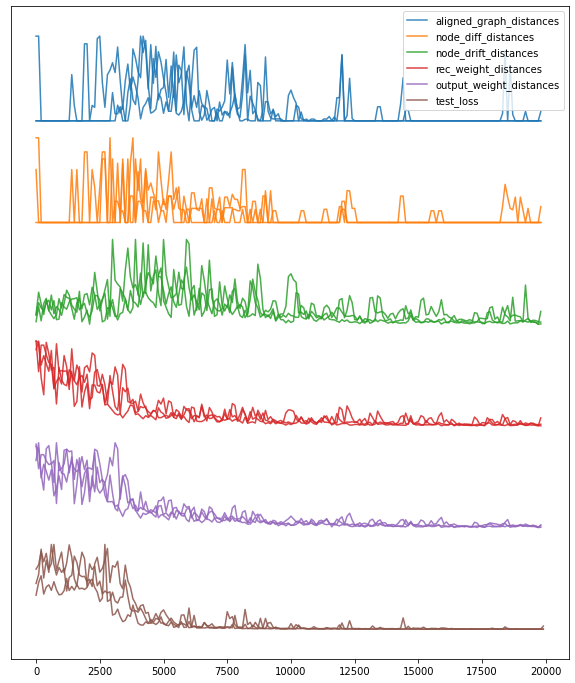

In [8]:
fig = plot_multiple_signals(signal_dicts, x_values=indices, signal_clips={'rec_weight_distances': 5})

In [ ]:
figs_path = 'figs/compare_algorithms/'
fig.savefig(os.path.join(figs_path, '{}.pdf'.format(name)), format='pdf')

In [20]:
### --- Plot full matrix --- ###
saved_run_name = file_names[2]
analysis_job_name = 'analyze_{}'.format(saved_run_name)
compare_job_name = 'compare_{}'.format(saved_run_name)

results_dir = '/scratch/oem214/learning-dynamics/results/'

analysis_result_path = os.path.join(results_dir, analysis_job_name)
compare_result_path = os.path.join(results_dir, compare_job_name)

### --- Unpack neighbor comparison results --- ###

with open(os.path.join(compare_result_path, 'result_0'), 'rb') as f:
    result = pickle.load(f)

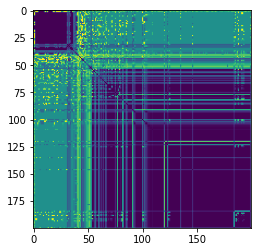

In [21]:
fig = plt.figure()
plt.imshow(result['aligned_graph_distances'] + result['aligned_graph_distances'].T)
figs_path = 'figs/full_distance_matrices/'
fig.savefig(os.path.join(figs_path, '{}.pdf'.format(saved_run_name)), format='pdf')

In [ ]:
for file_name in file_names:
    saved_run_name = file_name
    analysis_job_name = 'analyze_{}'.format(saved_run_name)
    compare_job_name = 'compare_{}'.format(saved_run_name)

    results_dir = '/scratch/oem214/learning-dynamics/results/'

    analysis_result_path = os.path.join(results_dir, analysis_job_name)
    indices, checkpoints = unpack_analysis_results(analysis_result_path)
    signals = unpack_compare_result(file_name, checkpoint_stats={'test_loss': get_checkpoint_loss})
    fig = plot_signals(signals, x_values=indices, signal_clips={'rec_weight_distances': 5})
    figs_path = 'figs/compare_algorithms/'
    fig.savefig(os.path.join(figs_path, '{}.pdf'.format(file_name)), format='pdf')

In [ ]:
file_name = 'RELU_multi_2_seed={}'.format(2)
saved_run_name = file_name
analysis_job_name = 'analyze_{}'.format(saved_run_name)
compare_job_name = 'compare_{}'.format(saved_run_name)

results_dir = '/scratch/oem214/learning-dynamics/results/'

analysis_result_path = os.path.join(results_dir, analysis_job_name)
indices, checkpoints = unpack_analysis_results(analysis_result_path)
signals = unpack_compare_result(file_name, checkpoint_stats={'test_loss': get_checkpoint_loss})

In [ ]:
plot_kinetic_energy_histograms(indices, checkpoints)

In [ ]:
for i_checkpoint in range(118000, 130000, 1000):
    checkpoint = checkpoints['checkpoint_{}'.format(i_checkpoint)]
    checkpoint_prev = checkpoints['checkpoint_{}'.format(i_checkpoint - 1000)]
    align_checkpoints(checkpoint, checkpoint_prev)
    plot_input_dependent_topology(checkpoint)

In [ ]:
plot_output_from_checkpoint(checkpoints['checkpoint_199000'], data)

In [ ]:
base_names = ['BPTT_multi', 'BPTT_KE_crit', 'BPTT_weak_KE',
              'BPTT_very_weak_KE', 'BPTT_yet_weaker_KE', 'BPTT_none_KE']
for base_name in base_names:
    file_names = [base_name+'_seed={}'.format(i) for i in range(5)]
    signal_dicts = []
    for file_name in file_names:
        saved_run_name = file_name
        analysis_job_name = 'analyze_{}'.format(saved_run_name)
        compare_job_name = 'compare_{}'.format(saved_run_name)

        results_dir = '/scratch/oem214/learning-dynamics/results/'

        analysis_result_path = os.path.join(results_dir, analysis_job_name)
        indices, checkpoints = unpack_analysis_results(analysis_result_path)
        signals = unpack_compare_result(file_name, checkpoint_stats={'test_loss': get_checkpoint_loss})
        signal_dicts.append(signals)

    fig = plot_multiple_signals(signal_dicts, x_values=indices, signal_clips={'rec_weight_distances': 5},
                                title=base_name)
    
    figs_path = 'figs/KE_criteria/'
    fig.savefig(os.path.join(figs_path, '{}.pdf'.format(base_name)), format='pdf')